In [1]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=6322d76d214d4e122c7cba14061aaa1a700dc1b9ea1aeee0d53bc3d9fd47041a
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


### Importing all the dependencies

In [2]:
#importing all the dependencies

import pandas as pd
import os
import json
from scipy.io import wavfile
import glob
import collections
import matplotlib.pyplot as plt
from python_speech_features import mfcc
import csv
import os
import wave
from scipy.io.wavfile import read
from sklearn import preprocessing as pp
import numpy as np
import librosa
import librosa.display
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import decomposition 
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pickle

### Importing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

PATHLoad = '/content/drive/MyDrive/GTZAN/'

Mounted at /content/drive


### Importing all the audio files from genre folders

In [6]:

#import the audio files from genre folder
#class = target representation
#blues  = 1
#classical = 2
#country = 3
#disco = 4
#hiphop = 5
#jazz = 6
#metal = 7
#pop = 8

audio_files = []
path1 = PATHLoad + 'genres/blues'
path2 = PATHLoad + 'genres/classical'
path3 = PATHLoad + 'genres/country'
path4 = PATHLoad + 'genres/disco'
path5 = PATHLoad + 'genres/hiphop'
path6 = PATHLoad + 'genres/jazz'
path7 = PATHLoad + 'genres/metal'
path8 = PATHLoad + 'genres/pop'


from scipy.io.wavfile import read

blues = []
classical = []
country = []
disco = []
hiphop = []
jazz = []
metal = []
pop = []

target = []

for filename in glob.glob(os.path.join(path1, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    blues.append( data[: , 0])
    target.append(1)

blues = np.array(blues)
    
for filename in glob.glob(os.path.join(path2, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    classical.append( data[: , 0])
    target.append(2)
    
classical = np.array(classical)
    
for filename in glob.glob(os.path.join(path3, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    country.append(data[: , 0])
    target.append(3)
    
country = np.array(country)
    
for filename in glob.glob(os.path.join(path4, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    disco.append(data[: , 0])
    target.append(4)
    
disco = np.array(disco)
    
for filename in glob.glob(os.path.join(path5, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    hiphop.append(data[: , 0])
    target.append(5)
    
hiphop = np.array(hiphop) 
    
for filename in glob.glob(os.path.join(path6, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    jazz.append(data[: , 0])
    target.append(6)
    
jazz = np.array(jazz)
    
for filename in glob.glob(os.path.join(path7, '*.wav')):
    (rate , data) = read(filename)
    data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
    metal.append(data[: , 0])
    target.append(7)
    
metal = np.array(metal)
    
# for filename in glob.glob(os.path.join(path8, '*.wav')):
#     (rate , data) = read(filename)
#     data = np.reshape(np.array(data, dtype=np.float32),(data.shape[0], 1))
#     pop.append(data[: , 0])
#     target.append(8)
    
# pop = np.array(pop)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/lo

### Calculating the energy spectrums of different audio files of all the genres

In [7]:

blues_spectrum = []
classical_spectrum = []
country_spectrum = []
disco_spectrum = []
hiphop_spectrum = []
jazz_spectrum = []
metal_spectrum = []
pop_spectrum = []

print(len(classical))

for i in range(100):
    blues_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(blues[i]))**2) )
    classical_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(classical[i]))**2))
    country_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(country[i]))**2))
    disco_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(disco[i]))**2))
    hiphop_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(hiphop[i]))**2))
    jazz_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(jazz[i]))**2))
    metal_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(metal[i]))**2))
    #pop_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(pop[i]))**2))
    


print(blues_spectrum[2])

100
[[1.9650882e+10 6.0626801e+09 5.4832205e+08 ... 1.0452825e+07
  9.2065800e+06 5.9286184e+07]
 [1.0702380e+11 1.0066238e+11 1.1323176e+11 ... 2.4170875e+08
  1.5227693e+08 1.8646011e+08]
 [2.9456548e+11 4.0720984e+11 4.7986042e+11 ... 1.1268735e+09
  3.6967770e+08 1.9581085e+08]
 ...
 [1.6755139e+04 4.1998306e+03 1.5460651e+01 ... 2.4705351e+01
  1.9695011e+01 2.5556963e+02]
 [1.5816575e+04 3.9594414e+03 7.8379412e+00 ... 5.4150801e+00
  1.1476836e+01 2.8775671e+02]
 [1.5576795e+04 3.8975037e+03 4.6652017e+00 ... 4.3829808e+00
  1.1604373e+01 2.7065762e+02]]


In [8]:
print(blues_spectrum[2])
print(blues[2].shape)

[[1.9650882e+10 6.0626801e+09 5.4832205e+08 ... 1.0452825e+07
  9.2065800e+06 5.9286184e+07]
 [1.0702380e+11 1.0066238e+11 1.1323176e+11 ... 2.4170875e+08
  1.5227693e+08 1.8646011e+08]
 [2.9456548e+11 4.0720984e+11 4.7986042e+11 ... 1.1268735e+09
  3.6967770e+08 1.9581085e+08]
 ...
 [1.6755139e+04 4.1998306e+03 1.5460651e+01 ... 2.4705351e+01
  1.9695011e+01 2.5556963e+02]
 [1.5816575e+04 3.9594414e+03 7.8379412e+00 ... 5.4150801e+00
  1.1476836e+01 2.8775671e+02]
 [1.5576795e+04 3.8975037e+03 4.6652017e+00 ... 4.3829808e+00
  1.1604373e+01 2.7065762e+02]]
(661794,)


## Displaying the Mel Spectrogram

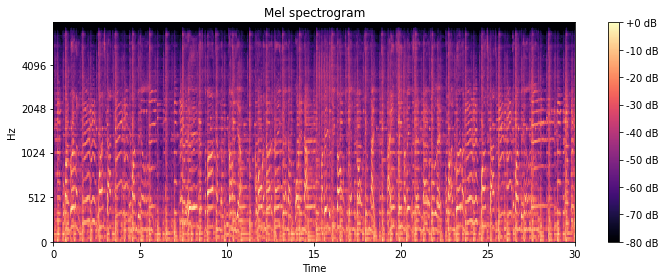

In [9]:
#observing variation of mel spectrogram through librosa.display library

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(blues_spectrum[0], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

#we have used power_to_db for scaling of mel_spectrogram features and its representation in decibel unit.

## Apply mfcc to audio files

(13, 324)
(13,)
[ 2.2738982e+03  4.0325226e+01 -1.8193293e+01  1.2218744e+01
 -3.0621591e+00  7.0194197e+00 -2.7575448e+00  1.9763741e+00
 -4.5725119e-01  3.7209511e+00  1.5016507e-01  2.9395774e-01
 -2.1280093e+00]


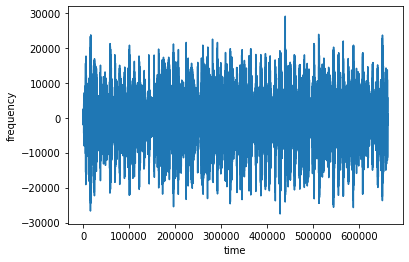

In [10]:
blues_mfcc = []
classical_mfcc = []
country_mfcc = []
disco_mfcc = []
hiphop_mfcc = []
jazz_mfcc = []
metal_mfcc = []
pop_mfcc = []

print(librosa.feature.mfcc(np.array(blues_spectrum[0]).flatten() , 44100 , n_mfcc = 13).shape)

for i in range(100):
    blues_mfcc.append(np.mean(librosa.feature.mfcc(np.array(blues_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))    
    classical_mfcc.append(np.mean(librosa.feature.mfcc(np.array(classical_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    country_mfcc.append(np.mean(librosa.feature.mfcc(np.array(country_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    disco_mfcc.append(np.mean(librosa.feature.mfcc(np.array(disco_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    hiphop_mfcc.append(np.mean(librosa.feature.mfcc(np.array(hiphop_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    jazz_mfcc.append(np.mean(librosa.feature.mfcc(np.array(jazz_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    metal_mfcc.append(np.mean(librosa.feature.mfcc(np.array(metal_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    #pop_mfcc.append(np.mean(librosa.feature.mfcc(np.array(pop_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
print(blues_mfcc[0].shape)
print(blues_mfcc[0])
plt.plot(blues[0])
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [11]:
print(blues_mfcc[2])

[ 2.2707874e+03  2.5975082e+01 -9.5789881e+00  6.7450666e+00
 -1.5775373e+00  2.9495430e+00 -9.1622406e-01  2.0856082e+00
  4.7320524e-01  7.1976346e-01 -8.7960976e-01 -2.3996256e-01
 -7.0763350e-01]


In [12]:
print(country_mfcc[0])

[ 2.3733438e+03  5.1205891e+01 -1.3345766e+01  1.3081688e+01
 -2.4227602e+00  8.6555309e+00  9.5287748e-02  5.2974663e+00
  9.4536757e-01  3.7781522e+00  1.2742407e+00  2.0819535e+00
  5.6987309e-01]


### MFCC PLOT

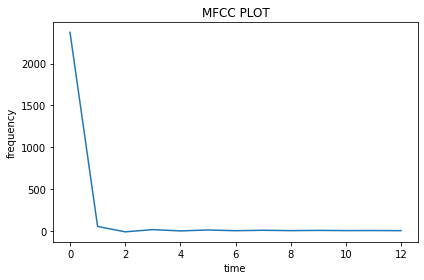

In [13]:
#plot for an MFCC of stereotype audio (dual audio channels with small difference in bandwidth)

plt.plot(country_mfcc[0])
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('MFCC PLOT')
plt.tight_layout()
plt.show()

## Calculating delta and delta-delta for corresponding mfcc values 

In [14]:

blues_mfcc_delta = []
classical_mfcc_delta = []
country_mfcc_delta = []
disco_mfcc_delta = []
hiphop_mfcc_delta = []
jazz_mfcc_delta = []
metal_mfcc_delta = []
pop_mfcc_delta = []

blues_mfcc_delta2 = []
classical_mfcc_delta2 = []
country_mfcc_delta2 = []
disco_mfcc_delta2 = []
hiphop_mfcc_delta2 = []
jazz_mfcc_delta2 = []
metal_mfcc_delta2 = []
pop_mfcc_delta2 = []

for i in range(100):
    blues_mfcc_delta.append(librosa.feature.delta(blues_mfcc[i]))
    classical_mfcc_delta.append(librosa.feature.delta(classical_mfcc[i]))
    country_mfcc_delta.append(librosa.feature.delta(country_mfcc[i]))
    disco_mfcc_delta.append(librosa.feature.delta(disco_mfcc[i]))
    hiphop_mfcc_delta.append(librosa.feature.delta(hiphop_mfcc[i]))
    jazz_mfcc_delta.append(librosa.feature.delta(jazz_mfcc[i]))
    metal_mfcc_delta.append(librosa.feature.delta(metal_mfcc[i]))
    #pop_mfcc_delta.append(librosa.feature.delta(pop_mfcc[i]))

print(blues_mfcc_delta[0])
print('shape of delta :' , blues_mfcc_delta[0].shape)

for i in range(100):
    blues_mfcc_delta2.append(librosa.feature.delta(blues_mfcc[i] , order = 2))
    classical_mfcc_delta2.append(librosa.feature.delta(classical_mfcc[i] , order = 2))
    country_mfcc_delta2.append(librosa.feature.delta(country_mfcc[i] , order = 2))
    disco_mfcc_delta2.append(librosa.feature.delta(disco_mfcc[i] , order = 2))
    hiphop_mfcc_delta2.append(librosa.feature.delta(hiphop_mfcc[i] , order = 2))
    jazz_mfcc_delta2.append(librosa.feature.delta(jazz_mfcc[i] , order = 2))
    metal_mfcc_delta2.append(librosa.feature.delta(metal_mfcc[i] , order = 2))
    #pop_mfcc_delta2.append(librosa.feature.delta(pop_mfcc[i] , order = 2))

print(blues_mfcc_delta2[0])
print('shape of delta2 :' , blues_mfcc_delta2[0].shape)

[-1.5311327e+02 -1.5311327e+02 -1.5311327e+02 -1.5311327e+02
 -1.5311327e+02 -1.8898183e+00  8.0078703e-01 -7.0598030e-01
 -1.4799650e-01 -1.4799650e-01 -1.4799650e-01 -1.4799650e-01
 -1.4799650e-01]
shape of delta : (13,)
[138.21268    138.21268    138.21268    138.21268    138.21268
   2.0513523   -1.00271      0.56098     -0.34844488  -0.34844488
  -0.34844488  -0.34844488  -0.34844488]
shape of delta2 : (13,)


In [15]:
print(blues_mfcc_delta[2])
print(blues_mfcc_delta2[2])

[-1.5232326e+02 -1.5232326e+02 -1.5232326e+02 -1.5232326e+02
 -1.5232326e+02 -1.3253716e+00  3.3265257e-01 -4.8194107e-01
 -1.2302530e-01 -1.2302529e-01 -1.2302529e-01 -1.2302529e-01
 -1.2302529e-01]
[137.97061    137.97061    137.97061    137.97061    137.97061
   1.2910669   -0.64724106   0.21949695  -0.1900573   -0.1900573
  -0.1900573   -0.1900573   -0.1900573 ]


## Calculating the rhythmic features for the audio files

In [16]:
blues_tempo = []
classical_tempo = []
country_tempo = []
disco_tempo = []
hiphop_tempo = []
jazz_tempo = []
metal_tempo = []
pop_tempo = []



for i in range(100):
    oenv_blues = librosa.onset.onset_strength(y = blues[i], sr= 44100, hop_length = 512)
    blues_tempo.append(librosa.beat.tempo(onset_envelope=oenv_blues ,sr=44100,hop_length=512)[0])
    oenv_classical = librosa.onset.onset_strength(y = classical[i], sr= 44100, hop_length = 512)
    classical_tempo.append(librosa.beat.tempo(onset_envelope=oenv_classical ,sr=44100,hop_length=512)[0])
    oenv_country = librosa.onset.onset_strength(y = country[i], sr= 44100, hop_length = 512)
    country_tempo.append(librosa.beat.tempo(onset_envelope=oenv_country ,sr=44100,hop_length=512)[0])
    oenv_disco = librosa.onset.onset_strength(y = disco[i], sr= 44100, hop_length = 512)
    disco_tempo.append(librosa.beat.tempo(onset_envelope=oenv_disco ,sr=44100,hop_length=512)[0])
    oenv_hiphop = librosa.onset.onset_strength(y = hiphop[i], sr= 44100, hop_length = 512)
    hiphop_tempo.append(librosa.beat.tempo(onset_envelope=oenv_hiphop ,sr=44100,hop_length=512)[0])
    oenv_jazz = librosa.onset.onset_strength(y = jazz[i], sr= 44100, hop_length = 512)
    jazz_tempo.append(librosa.beat.tempo(onset_envelope=oenv_jazz ,sr=44100,hop_length=512)[0])
    oenv_metal = librosa.onset.onset_strength(y = metal[i], sr= 44100, hop_length = 512)
    metal_tempo.append(librosa.beat.tempo(onset_envelope=oenv_metal ,sr=44100,hop_length=512)[0])
    #oenv_pop = librosa.onset.onset_strength(y = pop[i], sr= 44100, hop_length = 512)
    #pop_tempo.append(librosa.beat.tempo(onset_envelope=oenv_pop ,sr=44100,hop_length=512)[0])

In [17]:
print(oenv_blues[2])
print(oenv_blues[2].shape)
print(blues_tempo[2])
print(blues_tempo[2].shape)

0.0
()
126.04801829268293
()


## Preprocessing

(100, 661794)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering

[  240.   544.   250. ... -1822. -2001. -2103.]


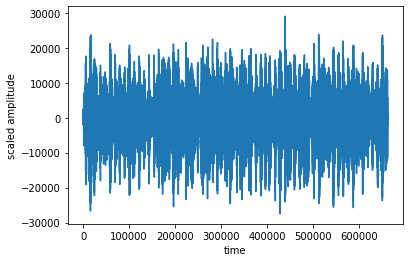

In [18]:
#preprocessing: MinMaxScaling with normalization using gaussian model. here, mean = 0 and standard dev. = 1 .


blues_scale = []
classical_scale = []
country_scale = []
disco_scale = []
hiphop_scale = []
jazz_scale = []
metal_scale = []
pop_scale = []

print(blues.shape)

for i in range(len(blues)):
    blues_scale.append(pp.scale(blues[i]))
    classical_scale.append( pp.scale(classical[i]))
    country_scale.append(pp.scale(country[i]))
    disco_scale.append(pp.scale(disco[i]))
    hiphop_scale.append(pp.scale(hiphop[i]))
    jazz_scale.append(pp.scale(jazz[i]))
    metal_scale.append(pp.scale(metal[i]))
    #pop_scale.append(pp.scale(pop[i]))

print(blues[0])
plt.plot(blues[0])
plt.xlabel('time')
plt.ylabel('scaled amplitude')
plt.show()



## cross_validation 

In [19]:
#adding X_value features and Target_features to form a dataset for applying cross_validation

dataset = [[0 for i in range(0, 41)]for j in range(0, 700)]
l = []
prev = []
k = 0
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = blues_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = blues_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = blues_mfcc_delta2[i][j]
    dataset[k][39] = blues_tempo[i]
    dataset[k][40] = target[i]    
    k += 1
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = classical_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = classical_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = classical_mfcc_delta2[i][j]
    dataset[k][39] = classical_tempo[i]
    dataset[k][40] = target[i+100]    
    k += 1    

for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = country_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = country_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = country_mfcc_delta2[i][j]
    dataset[k][39] = country_tempo[i]
    dataset[k][40] = target[i+200]    
    k += 1

for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = disco_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = disco_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = disco_mfcc_delta2[i][j]
    dataset[k][39] = disco_tempo[i]    
    dataset[k][40] = target[i+300]    
    k += 1
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = hiphop_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = hiphop_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = hiphop_mfcc_delta2[i][j]
    dataset[k][39] = hiphop_tempo[i]
    dataset[k][40] = target[i+400]    
    k += 1    
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = jazz_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = jazz_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = jazz_mfcc_delta2[i][j]
    dataset[k][39] = jazz_tempo[i]
    dataset[k][40] = target[i+500]    
    k += 1    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = metal_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = metal_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = metal_mfcc_delta2[i][j]
    dataset[k][39] = metal_tempo[i]
    dataset[k][40] = target[i+600]    
    k += 1    
    
# for i in range(100):
#     l = []
#     for j in range(13):
#         dataset[k][j] = pop_mfcc[i][j]
#     for j in range(13):
#         dataset[k][j+13] = pop_mfcc_delta[i][j]
#     for j in range(13):
#         dataset[k][j+26] = pop_mfcc_delta2[i][j]
#     dataset[k][39] = pop_tempo[i]
#     dataset[k][40] = target[i+700]    
#     k += 1        
dataset = np.array(dataset)
print(np.array(dataset)[2].shape)
print(dataset[2])

(41,)
[ 2.27078735e+03  2.59750824e+01 -9.57898808e+00  6.74506664e+00
 -1.57753730e+00  2.94954300e+00 -9.16224062e-01  2.08560824e+00
  4.73205239e-01  7.19763458e-01 -8.79609764e-01 -2.39962563e-01
 -7.07633495e-01 -1.52323257e+02 -1.52323257e+02 -1.52323257e+02
 -1.52323257e+02 -1.52323257e+02 -1.32537162e+00  3.32652569e-01
 -4.81941074e-01 -1.23025298e-01 -1.23025291e-01 -1.23025291e-01
 -1.23025291e-01 -1.23025291e-01  1.37970612e+02  1.37970612e+02
  1.37970612e+02  1.37970612e+02  1.37970612e+02  1.29106688e+00
 -6.47241056e-01  2.19496951e-01 -1.90057293e-01 -1.90057293e-01
 -1.90057293e-01 -1.90057293e-01 -1.90057293e-01  1.26048018e+02
  1.00000000e+00]


In [20]:
print(dataset.shape)
dataset[3]

(700, 41)


array([ 2.27332471e+03,  5.28139839e+01, -1.98401413e+01,  1.76333351e+01,
       -4.06931877e+00,  1.04069338e+01, -3.50040460e+00,  3.48058581e+00,
        4.37809885e-01,  3.89043808e+00, -1.74110091e+00,  7.70031381e-03,
       -2.22206259e+00, -1.53568253e+02, -1.53568253e+02, -1.53568253e+02,
       -1.53568253e+02, -1.53568253e+02, -2.70994854e+00,  5.54256320e-01,
       -1.21021104e+00, -3.31336945e-01, -3.31336945e-01, -3.31336945e-01,
       -3.31336945e-01, -3.31336945e-01,  1.38205276e+02,  1.38205276e+02,
        1.38205276e+02,  1.38205276e+02,  1.38205276e+02,  2.60507083e+00,
       -1.27843297e+00,  6.95561647e-01, -4.22917306e-01, -4.22917306e-01,
       -4.22917306e-01, -4.22917306e-01, -4.22917306e-01,  1.32512019e+02,
        1.00000000e+00])

## Applying PCA(Principal Component Analysis) for feature reduction 

In [21]:
sc = StandardScaler()
print(sc)
#dataset1 = sc.fit_transform(dataset[:, 0:40])
dataset1 = dataset[:, 0:40]
print(dataset1.shape)
print(dataset1[3].mean())
print(dataset1[2].shape)
print(dataset1[2])
print(len(target))

StandardScaler()
(700, 40)
59.53011574083401
(40,)
[ 2.27078735e+03  2.59750824e+01 -9.57898808e+00  6.74506664e+00
 -1.57753730e+00  2.94954300e+00 -9.16224062e-01  2.08560824e+00
  4.73205239e-01  7.19763458e-01 -8.79609764e-01 -2.39962563e-01
 -7.07633495e-01 -1.52323257e+02 -1.52323257e+02 -1.52323257e+02
 -1.52323257e+02 -1.52323257e+02 -1.32537162e+00  3.32652569e-01
 -4.81941074e-01 -1.23025298e-01 -1.23025291e-01 -1.23025291e-01
 -1.23025291e-01 -1.23025291e-01  1.37970612e+02  1.37970612e+02
  1.37970612e+02  1.37970612e+02  1.37970612e+02  1.29106688e+00
 -6.47241056e-01  2.19496951e-01 -1.90057293e-01 -1.90057293e-01
 -1.90057293e-01 -1.90057293e-01 -1.90057293e-01  1.26048018e+02]
700


## Splitting the dataset into training and testing data using cross_validation technique 


In [22]:
from sklearn.model_selection import train_test_split

train_x , test_x , train_y , test_y = train_test_split(dataset1 , target , test_size = 0.25 , random_state = 42)


## TRAINING
Random forest


In [23]:
accuracy = []
models = []

In [24]:
cls = sklearn.ensemble.RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , min_samples_split = 8)
#print(train_x)
#print(train_y.shape)
#for i in range(len(train_x)):
models = []
accuracy = []
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('random-forest')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ', accuracy_score(test_y , Y)*100)

Accuracy :  54.285714285714285


In [25]:
#pickling the randomForestClassifier
random_forest_file_name = 'random_forest1.pkl'
random_forest_model_pkl = open(random_forest_file_name , 'wb')
pickle.dump(cls ,random_forest_model_pkl)
random_forest_model_pkl.close()

In [26]:
print('CONFUSION MATRIX')
confusion_matrix(test_y, Y)

CONFUSION MATRIX


array([[13,  0,  6,  4,  1,  3,  3],
       [ 0, 16,  0,  0,  0,  6,  1],
       [ 4,  3, 12,  2,  0,  3,  6],
       [ 2,  0,  5, 16,  1,  2,  3],
       [ 1,  0,  0,  1, 12,  0,  3],
       [ 1,  1,  6,  0,  0, 15,  0],
       [ 1,  0,  5,  5,  1,  0, 11]])

In [27]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.59      0.43      0.50        30
           2       0.80      0.70      0.74        23
           3       0.35      0.40      0.38        30
           4       0.57      0.55      0.56        29
           5       0.80      0.71      0.75        17
           6       0.52      0.65      0.58        23
           7       0.41      0.48      0.44        23

    accuracy                           0.54       175
   macro avg       0.58      0.56      0.56       175
weighted avg       0.56      0.54      0.55       175



k-neighbors


In [28]:
cls = sklearn.neighbors.KNeighborsClassifier()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('k-neighbors')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' ,accuracy_score(test_y , Y)*100 )

Accuracy :  36.0


In [29]:
#pickling the KNeighborsClassifier
KNeighbors_file_name = 'KNeighbors.pkl'
KNeighbors_model_pkl = open(KNeighbors_file_name , 'wb')
pickle.dump(cls ,KNeighbors_model_pkl)
KNeighbors_model_pkl.close()

In [30]:
print('CONFUSION MATRIX')
confusion_matrix(test_y, Y)

CONFUSION MATRIX


array([[ 4,  0,  5, 10,  2,  4,  5],
       [ 1, 18,  2,  0,  0,  1,  1],
       [ 7,  3,  9,  5,  0,  2,  4],
       [ 5,  1,  5, 12,  2,  2,  2],
       [ 4,  0,  1,  2, 10,  0,  0],
       [ 4,  4,  2,  5,  0,  7,  1],
       [ 6,  0,  7,  7,  0,  0,  3]])

In [31]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.13      0.13      0.13        30
           2       0.69      0.78      0.73        23
           3       0.29      0.30      0.30        30
           4       0.29      0.41      0.34        29
           5       0.71      0.59      0.65        17
           6       0.44      0.30      0.36        23
           7       0.19      0.13      0.15        23

    accuracy                           0.36       175
   macro avg       0.39      0.38      0.38       175
weighted avg       0.36      0.36      0.36       175



 Support Vector Machine 

In [32]:
cls = sklearn.svm.SVC(C = 5000, gamma = 0.0005, kernel = 'rbf')
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('svm')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' ,accuracy_score(test_y , Y)*100)

Accuracy :  49.142857142857146


In [33]:
#pickling the SVM
SVM_file_name = 'SVM.pkl'
SVM_model_pkl = open(SVM_file_name , 'wb')
pickle.dump(cls ,SVM_model_pkl)
SVM_model_pkl.close()

In [34]:
print('CONFUSION MATRIX')
confusion_matrix(test_y, Y)

CONFUSION MATRIX


array([[13,  0,  4,  8,  1,  2,  2],
       [ 0, 14,  3,  0,  0,  6,  0],
       [ 6,  3, 15,  2,  0,  2,  2],
       [ 3,  1,  5, 12,  2,  1,  5],
       [ 3,  1,  0,  1, 12,  0,  0],
       [ 1,  2,  4,  1,  0, 15,  0],
       [ 2,  0,  8,  3,  5,  0,  5]])

In [35]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.46      0.43      0.45        30
           2       0.67      0.61      0.64        23
           3       0.38      0.50      0.43        30
           4       0.44      0.41      0.43        29
           5       0.60      0.71      0.65        17
           6       0.58      0.65      0.61        23
           7       0.36      0.22      0.27        23

    accuracy                           0.49       175
   macro avg       0.50      0.50      0.50       175
weighted avg       0.49      0.49      0.49       175



Decision-tree

In [36]:
cls = sklearn.tree.DecisionTreeClassifier()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('decision-tree')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' , accuracy_score(test_y , Y)*100)


Accuracy :  45.14285714285714


In [37]:
#pickling the DecisionTreeClassifier
DecisionTreeClassifier_file_name = 'DecisionTreeClassifier.pkl'
DecisionTreeClassifier_model_pkl = open(DecisionTreeClassifier_file_name , 'wb')
pickle.dump(cls ,DecisionTreeClassifier_model_pkl)
DecisionTreeClassifier_model_pkl.close()

In [38]:
print('CONFUSION MATRIX')
confusion_matrix(test_y, Y)

CONFUSION MATRIX


array([[13,  0,  4,  3,  1,  5,  4],
       [ 0, 12,  2,  0,  1,  5,  3],
       [ 5,  4, 11,  0,  0,  7,  3],
       [ 4,  1,  3, 11,  3,  3,  4],
       [ 4,  0,  0,  1, 12,  0,  0],
       [ 2,  3,  5,  1,  0, 10,  2],
       [ 2,  0,  1,  6,  2,  2, 10]])

In [39]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.43      0.43      0.43        30
           2       0.60      0.52      0.56        23
           3       0.42      0.37      0.39        30
           4       0.50      0.38      0.43        29
           5       0.63      0.71      0.67        17
           6       0.31      0.43      0.36        23
           7       0.38      0.43      0.41        23

    accuracy                           0.45       175
   macro avg       0.47      0.47      0.46       175
weighted avg       0.46      0.45      0.45       175



Gradient Boosting Classifier

In [40]:
cls = sklearn.ensemble.GradientBoostingClassifier()

cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('gradientboosting')
accuracy.append(accuracy_score(test_y , Y)*100)
print('accuracy : ' , accuracy_score(test_y , Y)*100)

accuracy :  60.0


In [41]:
print(train_x.shape)

(525, 40)


In [42]:
#pickling the GradientBoostingClassifier
GradientBoostingClassifier_file_name = 'GradientBoostingClassifier1.pkl'
GradientBoostingClassifier_model_pkl = open(GradientBoostingClassifier_file_name , 'wb')
pickle.dump(cls ,GradientBoostingClassifier_model_pkl)
GradientBoostingClassifier_model_pkl.close()

In [43]:
print('CONFUSION MATRIX')
confusion_matrix(test_y, Y)

CONFUSION MATRIX


array([[17,  0,  3,  3,  0,  4,  3],
       [ 0, 17,  2,  1,  1,  1,  1],
       [ 5,  3, 13,  1,  0,  2,  6],
       [ 4,  0,  3, 15,  1,  1,  5],
       [ 1,  0,  0,  0, 14,  1,  1],
       [ 1,  1,  2,  1,  0, 18,  0],
       [ 2,  0,  5,  3,  1,  1, 11]])

In [44]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.57      0.57      0.57        30
           2       0.81      0.74      0.77        23
           3       0.46      0.43      0.45        30
           4       0.62      0.52      0.57        29
           5       0.82      0.82      0.82        17
           6       0.64      0.78      0.71        23
           7       0.41      0.48      0.44        23

    accuracy                           0.60       175
   macro avg       0.62      0.62      0.62       175
weighted avg       0.60      0.60      0.60       175



<font color="skyblue" size=10 justify="center"><u>The End</u></font>